In [1]:
# Import Pandas
import pandas as pd
# Import Numpy
import numpy as np
# Import Bokeh
#import bokeh.plotting as bk
#import bokeh.io as bi
#from bokeh.io import export_svgs
#bi.output_notebook()
import matplotlib.pyplot as plt
from Algorithms import cm2in
from Algorithms import TUBScolorscale
# Make the relevant Inputs
export_folder = "../Latex/Graphics/"
model_name = "SISO_Robustness"

# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5

In [2]:
# Read the Data
Data = pd.read_csv('./Experiments/SISO/SISO_06102017_TRAND.csv', sep=';')
# Give the Columns
Data.columns

Index([u'Unnamed: 0', u'Sample No.', u'Order', u'K', u'TSum', u'L', u'KM',
       u'TM', u'LM', u'MS Real', u'MS Ideal', u'MT Real', u'MT Ideal'],
      dtype='object')

In [3]:
# Sample Count
msreal_sample = Data['MS Real']
msreal_sample = msreal_sample.notnull().sum()

# Get Data above 2
msreal_unstable = Data[Data['MS Real']>2.0]
msreal_unstable = msreal_unstable['MS Real'].notnull().sum()

msreal_sample, msreal_unstable

(9000, 0)

# Plot the Evaluation

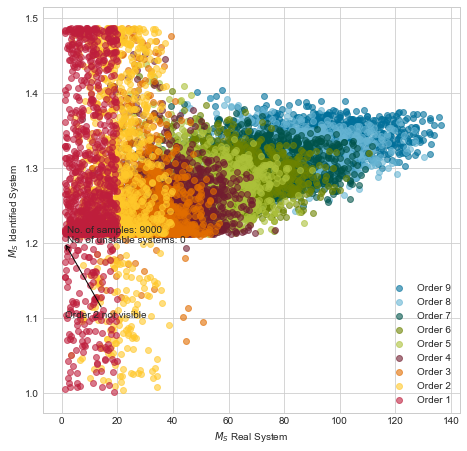

In [12]:
# Get the variables
mscount_real = 0
mscount_iden = 0
x = []
y = []
order=[]
x2 = []
y2 = []

# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_width))

# Loop over the data, backwards
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['MS Ideal']
    ms_re = Data[((Data['Order'] == cur_order))]['TSum']
    x.append(np.mean(ms_id))
    x2.append(np.var(ms_id))
    y.append(np.mean(ms_re))
    y2.append(np.var(ms_re))
    order.append(cur_order)
    # Add to the plot
    ax.scatter(ms_re,ms_id, label = "Order "+str(cur_order), color = TUBScolorscale[cur_order], alpha = 0.6)

# Make Annotations
ax.annotate('Order 2 not visible',
            xy=(1.0, 1.2), xycoords='data',
            xytext=(1.2, 1.1), textcoords='data',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('No. of samples: '+str(msreal_sample)+"\nNo. of unstable systems: "+str(msreal_unstable),
            xy=(2., 1.2), xycoords='data',
            xytext=(2., 1.2), textcoords='data')

ax.grid(True)
ax.set_ylabel('$M_S$ Identified System')
ax.set_xlabel('$M_S$ Real System')

plt.legend(loc="lower right")
#plt.savefig(export_folder+model_name+".svg")
plt.show()

In [18]:
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['MS Ideal']
    ms_re = Data[((Data['Order'] == cur_order))]['MS Real']
    print(np.corrcoef(ms_id, ms_re))

[[ 1.          0.99887301]
 [ 0.99887301  1.        ]]
[[ 1.          0.99865087]
 [ 0.99865087  1.        ]]
[[ 1.          0.99818297]
 [ 0.99818297  1.        ]]
[[ 1.          0.99785814]
 [ 0.99785814  1.        ]]
[[ 1.          0.99632265]
 [ 0.99632265  1.        ]]
[[ 1.          0.99143793]
 [ 0.99143793  1.        ]]
[[ 1.          0.86948141]
 [ 0.86948141  1.        ]]
[[ 1.          0.95211854]
 [ 0.95211854  1.        ]]
[[ 1.          0.99980403]
 [ 0.99980403  1.        ]]


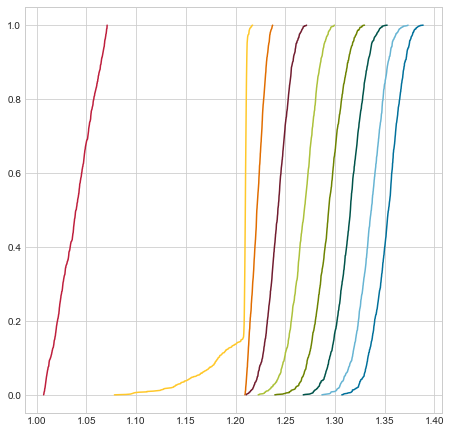

In [9]:
# Make a histogram
from scipy.stats import norm

fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_width))
x = []
y = []
for cur_order in range(1,10):
    x = np.sort(Data[((Data['Order'] == cur_order))]['MS Real'])
    # Get the cdf
    y = np.array(range(len(x)))/float(len(x))
    ax.plot(x,y, color = TUBScolorscale[cur_order])
#ax.hist(x, 500, normed=1, histtype='stepfilled',stacked= True, color=TUBScolorscale[1:10], alpha = 0.7)
plt.show()

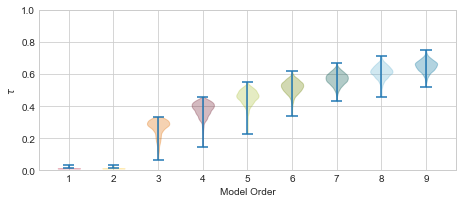

In [72]:
# Create a Plot for the normalized Time
# Empty dicts for storage
y = []
order = []

# Make a plot
plt.clf()
fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_height))
# Data iteration
for cur_order in range(1,10):
    #x.append(Data[((Data['Order'] == cur_order))]['Order'])
    y.append(Data[((Data['Order'] == cur_order))]['LM']/(Data[((Data['Order'] == cur_order))]['TM']+Data[((Data['Order'] == cur_order))]['LM']))
    order.append(cur_order)

parts = ax.violinplot(y)

counter = 1
for pc in parts['bodies']:
    pc.set_facecolor(TUBScolorscale[counter])
    pc.set_edgecolor(TUBScolorscale[counter])
    counter = counter+1

from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel("Model Order")
ax.set_ylabel("$\\tau$")
ax.set_ylim([0,1])

plt.savefig(export_folder+model_name+"_NormalizedTime.svg")
plt.show()

In [6]:
# select a palette
from bokeh.palettes import Plasma9  as palette
# itertools handles the cycling
import itertools  
from bokeh.models import Range1d, Label

# create a color iterator
colors = itertools.cycle(palette)
# count higher then MS > 5
mscount_real = 0
mscount_iden = 0
x = []
y = []
order=[]
x2 = []
y2 = []

p2 = bk.figure(plot_width = 800, plot_height = 800, x_range=(0.9, 2), y_range=(0.9, 2), x_axis_label='Maximum Sensitivity Real System', y_axis_label='Maximum Sensitivity Identified System')
for i, color in zip(range(10,1,-1), colors):
    # Load the Data
    ms_id = Data[((Data['Order'] == i))]['MS Ideal']
    ms_re = Data[((Data['Order'] == i))]['MS Real']
    x.append(np.mean(ms_id))
    x2.append(np.var(ms_id))
    y.append(np.mean(ms_re))
    y2.append(np.var(ms_re))
    order.append(i)
    p2.scatter(ms_re,ms_id, color = color, alpha = 1, legend='Order '+str(i-1))

# Get the legend horizontal    
p2.legend.orientation='horizontal'
# Make a copy for later plot
p3 = p2

# Add annotation
label1 = Label(x=1.4, y=1.0, text='No. of samples: '+str(msreal_sample))
label2 = Label(x=1.4, y=0.975, text='Critical Systems: '+str(msreal_unstable))
p2.add_layout(label1)
p2.add_layout(label2)
# Show and Export
p2.output_backend = "svg"
export_svgs(p2, filename="SISO_Robustness.svg")

bk.show(p2)

In [10]:
# select a palette
from bokeh.palettes import Plasma9  as palette
# itertools handles the cycling
import itertools  
from bokeh.models import Range1d, Label

# create a color iterator
colors = itertools.cycle(palette)
# count higher then MS > 5
mscount_real = 0
mscount_iden = 0
x = []
y = []
order=[]
x2 = []
y2 = []

p2 = bk.figure(plot_width = 800, plot_height = 800,x_range=(0,150),y_range=(0,150), x_axis_label='TSum', y_axis_label='TRise')
for i, color in zip(range(10,1,-1), colors):
    # Load the Data
    ms_id = Data[((Data['Order'] == i))]['Tr_RSW']
    ms_re = Data[((Data['Order'] == i))]['TSum']
    p2.scatter(ms_re,ms_id, color = color, alpha = 1, legend='Order '+str(i-1))

# Get the legend horizontal    
p2.legend.orientation='horizontal'
# Make a copy for later plot
p3 = p2

# Add annotation
#label1 = Label(x=1.4, y=1.0, text='No. of samples: '+str(msreal_sample))
#label2 = Label(x=1.4, y=0.975, text='Critical Systems: '+str(msreal_unstable))
#p2.add_layout(label1)
#p2.add_layout(label2)
# Show and Export
#p2.output_backend = "svg"
#export_svgs(p2, filename="SISO_Robustness.svg")

bk.show(p2)

In [18]:
# select a palette
from bokeh.palettes import Plasma9  as palette
# itertools handles the cycling
import itertools  
from bokeh.models import Range1d, Label

# create a color iterator
colors = itertools.cycle(palette)
# count higher then MS > 5
mscount_real = 0
mscount_iden = 0
x = []
y = []
order=[]
x2 = []
y2 = []

p2 = bk.figure(plot_width = 800, plot_height = 800, x_axis_label='TSum', y_axis_label='TRise')
for i, color in zip(range(10,1,-1), colors):
    # Load the Data
    ms_id = Data[((Data['Order'] == i))]['Tr_RSW']
    ms_id2 = Data[((Data['Order'] == i))]['Ts_RSW']
    ms_re = Data[((Data['Order'] == i))]['TSum']
    order.append(i-1)
    p2.scatter(ms_id2/ms_re,ms_id/ms_re, color = color, alpha = 1, legend='Order '+str(i-1))

# Get the legend horizontal    
p2.legend.orientation='horizontal'
# Make a copy for later plot
p3 = p2

# Add annotation
#label1 = Label(x=1.4, y=1.0, text='No. of samples: '+str(msreal_sample))
#label2 = Label(x=1.4, y=0.975, text='Critical Systems: '+str(msreal_unstable))
#p2.add_layout(label1)
#p2.add_layout(label2)
# Show and Export
#p2.output_backend = "svg"
#export_svgs(p2, filename="SISO_Robustness.svg")

bk.show(p2)

In [14]:
from bokeh.models import Band

p5 = bk.figure(plot_width = 800, plot_height = 300, x_axis_label='Model Order', y_axis_label='Normalized Time')

# Empty dicts for storage
ymean = []
ymax = []
ymin = []
order = []

# Data iteration
for i, color in zip(range(10,1,-1), colors):
    x = Data[((Data['Order'] == i))]['Order']
    y = Data[((Data['Order'] == i))]['LM']/(Data[((Data['Order'] == i))]['TM']+Data[((Data['Order'] == i))]['LM'])
    order.append(i)
    ymean.append((np.mean(y)))
    ymax.append(np.max(y))
    ymin.append(np.min(y))
    p5.scatter(x,y, color = color, legend='Order '+str(i-1))

# Get the legend horizontal    
p5.legend.orientation='horizontal'

# Add the Band
band = Band(x=order, upper=ymax, lower = ymin, level='underlay',
            fill_alpha=1.0, line_width=1, line_color='black')
p5.add_layout(band)
#p5.line(order,ymean, line_dash='dashed', color='black')
# Show and Export
#p5.output_backend = "svg"
#export_svgs(p5, filename="SISO_NormalizedTime.svg")

bk.show(p5)

ValueError: expected an element of either String, Dict(Enum('field', 'value', 'transform', 'units'), Either(String, Instance(Transform), Float)) or Float, got [0.029811251098300129, 0.32366385328311664, 0.46213764937767282, 0.55504810442996722, 0.62907774174020659, 0.68913173039194264, 0.73365430931689746, 0.77168165369875397, 0.80101740372202523]

In [7]:
p2 = bk.figure(plot_width = 800, plot_height = 300)
for i, color in zip(range(1,10), colors):
    ideal = Data[((Data['Order'] == i))]['Ts_RSW']
    real = Data[((Data['Order'] == i))]['Ts_R']
    p2.scatter(real,ideal, color = color)
bk.show(p2)

In [47]:
import bokeh
p = BoxPlot(Data, values='vals', label='cyl',
 legend='bottom_right')

NameError: name 'BoxPlot' is not defined

In [91]:
p1 = bk.figure(plot_width = 800, plot_height = 800, x_range=(0.8,2.0))
p2 = bk.figure(plot_width = 800, plot_height = 800, x_range=(0.8,2.0))

for i, color in zip(range(1,10), colors):
    # Load the Data
    ms_id = Data[((Data['Order'] == i))]['MS Ideal']
    ms_re = Data[((Data['Order'] == i))]['MS Real']
    
    hist1, edges1 = np.histogram(ms_id, density=True, bins=50)
    hist2, edges2 = np.histogram(ms_re, density=True, bins=50)
    
    p1.quad(top=hist1, bottom=0, left=edges1[:-1], right=edges1[1:],
        fill_color=color, line_color=color, legend='Order '+str(i))
    p2.quad(top=hist2, bottom=0, left=edges2[:-1], right=edges2[1:],
        fill_color=color, line_color=color, legend='Order '+str(i))
    
    
p1.legend.orientation='horizontal'
p2.legend.orientation='horizontal'
bk.show(p1)
bk.show(p2)
